<a href="https://www.vivaair.com"><img src = "https://upload.wikimedia.org/wikipedia/commons/a/a1/Logosvivaair_Mesa-de-trabajo-1.png" width = 250, align = "Right"></a>

# Fuel Policy / Analytics - OCC
    
***

    
### Descripción:
Este Notebook tiene como objetivo consolidar la pólitica de consumo de combustible para la aerolínea <a href="www.vivaair.com">Viva Air </a> teniendo en cuenta los mejores algoritmos de clasificación y predicción




## 1. Models


In [18]:
#Librerias a utilizar
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import joblib 
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
def Interaction(a,b,Master_):
    for i in a:
        for j in b:
            if i==j:
                Master_[i+"^2"]=Master_[i]**2
            else:
                Master_[i+"_"+j]=Master_[i]*Master_[j]

In [3]:
#Modelo de clasificación
class_model = joblib.load('Classification_Model.pkl')  
class_model

Pipeline(steps=[('Gradient Boosting',
                 GradientBoostingClassifier(max_depth=10, random_state=0))])

In [4]:
#Modelo de predicción
predict_model = joblib.load('Prediction_Model.pkl')  
predict_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('Random Forest',
                 RandomForestClassifier(criterion='entropy', max_depth=14,
                                        random_state=0))])

In [5]:
#Parametros correspondientes a las estadísticas descripticas de las rutas
Legs_info=pd.read_excel("Legs Info - Viva Air.xlsx").set_index('Leg')
Legs_info=Legs_info[Legs_info['VVC']==1]

## 2. Function

In [6]:
#Función que calcula la cantidad de combustible adicional a agregar según las caracteristicas del vuelo
def Policy(Leg,Pax,Temperature,Wind,HVsby,VVsby,Fog_Brume):
    
    request=[{
        'Leg': Leg,
        'Fuel Burn std':Legs_info.loc[Leg]['Fuel Burn Std'],
        'Fuel Burn Range':Legs_info.loc[Leg]['Fuel Burn range'],
        'Flight Time':Legs_info.loc[Leg]['Flight Time'],
        'Fuel Burn std':Legs_info.loc[Leg]['Fuel Burn Std'],
        'Flight Time std':Legs_info.loc[Leg]['Flight Time std'],
        'Flight Time Range':Legs_info.loc[Leg]['Flight Time Range'],
        'Pax':Pax,
        'Temperature':Temperature,
        'Wind':Wind, 
        'H Vsby':HVsby, 
        'V Vsby':VVsby,
        'VVC':Legs_info.loc[Leg]['VVC'],
        'New AC':1,
        'Fog-Brume':Fog_Brume,
        'Long Flight Time':Legs_info.loc[Leg]['Long Flight Time']}]
    
    df=pd.DataFrame(request)
        
    Con=['Flight Time','Flight Time std','Flight Time Range']
    Cat=['VVC','New AC','Long Flight Time']

    Interaction(Con,Cat,df)

    Con=['Flight Time','Temperature','Wind','H Vsby','V Vsby']
    Cat=['Fog-Brume']

    Interaction(Con,Cat,df)
    
    if class_model.predict(df.iloc[:,1:])[0]==0:
        answer='El vuelo '+Leg+' no requiere de combustible adicional'
    else:
        answer='El vuelo '+Leg+' requiere de '+str(predict_model.predict(df.iloc[:,1:])[0])+' Kg'
    return answer 

In [7]:
#Ejemplo
Policy(Leg='ADZMDE',Pax=188,Temperature=20,Wind=3,HVsby=0.5,VVsby=1000,Fog_Brume=1)

'El vuelo ADZMDE requiere de 500 Kg'

## 3. Policy

In [8]:
#Iterador de variables para la configuración de la politica
Legs=np.array(Legs_info.index)
Pax=np.append(np.arange(130,188,10),188)
Temperature=np.arange(0,35,5)
Wind=np.arange(0,20,5)
HVsby=np.append(np.arange(0,5,1),6.21)
VVsby=np.arange(0,4000,500)
Fog_Brume=np.array([0,1])

In [9]:
len(Legs)*len(Pax)*len(Temperature)*len(Wind)*len(HVsby)*len(VVsby)*len(Fog_Brume)

1016064

In [13]:
%timeit

rows=[{
        'Leg':i,
        'Fuel Burn std':Legs_info.loc[i]['Fuel Burn Std'],
        'Fuel Burn Range':Legs_info.loc[i]['Fuel Burn range'],
        'Flight Time':Legs_info.loc[i]['Flight Time'],
        'Fuel Burn std':Legs_info.loc[i]['Fuel Burn Std'],
        'Flight Time std':Legs_info.loc[i]['Flight Time std'],
        'Flight Time Range':Legs_info.loc[i]['Flight Time Range'],
        'Pax':j,
        'Temperature':k,
        'Wind':l, 
        'H Vsby':m, 
        'V Vsby':n,
        'VVC':Legs_info.loc[i]['VVC'],
        'New AC':1,
        'Fog-Brume':o,
        'Long Flight Time':Legs_info.loc[i]['Long Flight Time']}
    for i in Legs for j in Pax for k in Temperature for l in Wind for m in HVsby for n in VVsby for o in Fog_Brume]

In [14]:
df=a=pd.DataFrame(columns=['Leg', 'Fuel Burn std', 'Fuel Burn Range', 'Flight Time',
       'Flight Time std', 'Flight Time Range', 'Pax', 'Temperature', 'Wind',
       'H Vsby', 'V Vsby', 'VVC', 'New AC', 'Fog-Brume', 'Long Flight Time'])

df=df.append(rows,ignore_index=True)

Con=['Flight Time','Flight Time std','Flight Time Range']
Cat=['VVC','New AC','Long Flight Time']

Interaction(Con,Cat,df)

Con=['Flight Time','Temperature','Wind','H Vsby','V Vsby']
Cat=['Fog-Brume']

Interaction(Con,Cat,df)

df

,Leg,Fuel Burn std,Fuel Burn Range,Flight Time,Flight Time std,Flight Time Range,Pax,Temperature,Wind,H Vsby,V Vsby,VVC,New AC,Fog-Brume,Long Flight Time,Flight Time_VVC,Flight Time_New AC,Flight Time_Long Flight Time,Flight Time std_VVC,Flight Time std_New AC,Flight Time std_Long Flight Time,Flight Time Range_VVC,Flight Time Range_New AC,Flight Time Range_Long Flight Time,Flight Time_Fog-Brume,Temperature_Fog-Brume,Wind_Fog-Brume,H Vsby_Fog-Brume,V Vsby_Fog-Brume
0,ADZBOG,234.0,2010.0,101.0,4.905819,44.0,130,0,0,0.00,0,1.0,1,0,0.0,101.0,101,0.0,4.905819,4.90582,0.0,44.0,44,0.0,0,0,0,0,0
1,ADZBOG,234.0,2010.0,101.0,4.905819,44.0,130,0,0,0.00,0,1.0,1,1,0.0,101.0,101,0.0,4.905819,4.90582,0.0,44.0,44,0.0,101,0,0,0,0
2,ADZBOG,234.0,2010.0,101.0,4.905819,44.0,130,0,0,0.00,500,1.0,1,0,0.0,101.0,101,0.0,4.905819,4.90582,0.0,44.0,44,0.0,0,0,0,0,0
3,ADZBOG,234.0,2010.0,101.0,4.905819,44.0,130,0,0,0.00,500,1.0,1,1,0.0,101.0,101,0.0,4.905819,4.90582,0.0,44.0,44,0.0,101,0,0,0,500
4,ADZBOG,234.0,2010.0,101.0,4.905819,44.0,130,0,0,0.00,1000,1.0,1,0,0.0,101.0,101,0.0,4.905819,4.90582,0.0,44.0,44,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016059,SMRPEI,255.0,2830.0,67.0,3.765307,39.0,188,30,15,6.21,2500,1.0,1,1,0.0,67.0,67,0.0,3.765307,3.76531,0.0,39.0,39,0.0,67,30,15,6.21,2500
1016060,SMRPEI,255.0,2830.0,67.0,3.765307,39.0,188,30,15,6.21,3000,1.0,1,0,0.0,67.0,67,0.0,3.765307,3.76531,0.0,39.0,39,0.0,0,0,0,0,0
1016061,SMRPEI,255.0,2830.0,67.0,3.765307,39.0,188,30,15,6.21,3000,1.0,1,1,0.0,67.0,67,0.0,3.765307,3.76531,0.0,39.0,39,0.0,67,30,15,6.21,3000
1016062,SMRPEI,255.0,2830.0,67.0,3.765307,39.0,188,30,15,6.21,3500,1.0,1,0,0.0,67.0,67,0.0,3.765307,3.76531,0.0,39.0,39,0.0,0,0,0,0,0


In [15]:
X=df.iloc[:,1:]
Final=df
Final['Class']=class_model.predict(X)
Final['Predict']=predict_model.predict(X)
Final['Predict']=[0 if Final['Class'].iloc[x]==0 else Final['Predict'].iloc[x] for x in Final.index]

Final

,Leg,Fuel Burn std,Fuel Burn Range,Flight Time,Flight Time std,Flight Time Range,Pax,Temperature,Wind,H Vsby,V Vsby,VVC,New AC,Fog-Brume,Long Flight Time,Flight Time_VVC,Flight Time_New AC,Flight Time_Long Flight Time,Flight Time std_VVC,Flight Time std_New AC,Flight Time std_Long Flight Time,Flight Time Range_VVC,Flight Time Range_New AC,Flight Time Range_Long Flight Time,Flight Time_Fog-Brume,Temperature_Fog-Brume,Wind_Fog-Brume,H Vsby_Fog-Brume,V Vsby_Fog-Brume,Class,Predict
0,ADZBOG,234.0,2010.0,101.0,4.905819,44.0,130,0,0,0.00,0,1.0,1,0,0.0,101.0,101,0.0,4.905819,4.90582,0.0,44.0,44,0.0,0,0,0,0,0,0,0
1,ADZBOG,234.0,2010.0,101.0,4.905819,44.0,130,0,0,0.00,0,1.0,1,1,0.0,101.0,101,0.0,4.905819,4.90582,0.0,44.0,44,0.0,101,0,0,0,0,0,0
2,ADZBOG,234.0,2010.0,101.0,4.905819,44.0,130,0,0,0.00,500,1.0,1,0,0.0,101.0,101,0.0,4.905819,4.90582,0.0,44.0,44,0.0,0,0,0,0,0,0,0
3,ADZBOG,234.0,2010.0,101.0,4.905819,44.0,130,0,0,0.00,500,1.0,1,1,0.0,101.0,101,0.0,4.905819,4.90582,0.0,44.0,44,0.0,101,0,0,0,500,0,0
4,ADZBOG,234.0,2010.0,101.0,4.905819,44.0,130,0,0,0.00,1000,1.0,1,0,0.0,101.0,101,0.0,4.905819,4.90582,0.0,44.0,44,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016059,SMRPEI,255.0,2830.0,67.0,3.765307,39.0,188,30,15,6.21,2500,1.0,1,1,0.0,67.0,67,0.0,3.765307,3.76531,0.0,39.0,39,0.0,67,30,15,6.21,2500,1,100
1016060,SMRPEI,255.0,2830.0,67.0,3.765307,39.0,188,30,15,6.21,3000,1.0,1,0,0.0,67.0,67,0.0,3.765307,3.76531,0.0,39.0,39,0.0,0,0,0,0,0,1,100
1016061,SMRPEI,255.0,2830.0,67.0,3.765307,39.0,188,30,15,6.21,3000,1.0,1,1,0.0,67.0,67,0.0,3.765307,3.76531,0.0,39.0,39,0.0,67,30,15,6.21,3000,1,100
1016062,SMRPEI,255.0,2830.0,67.0,3.765307,39.0,188,30,15,6.21,3500,1.0,1,0,0.0,67.0,67,0.0,3.765307,3.76531,0.0,39.0,39,0.0,0,0,0,0,0,1,100


In [16]:
Final.to_excel("Master Policy - Viva Air.xlsx")

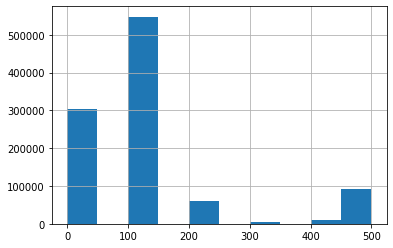

In [19]:
Final['Predict'].hist()